# Sequential Graph
The purpose of the following state machine is to create a sequantial graph with multiple nodes, by introducing the idea of edges.
An edge is a connection between two nodes. For the purposes of lang-graph, an edge represents the direction of execution between nodes. Hence it can be used to introduce node sequences where the state is passed and processed. 

In [41]:
# Import dependencies
from typing import TypedDict
from langgraph.graph import StateGraph

In [42]:
# Define the state model
class AgentState(TypedDict):
    name: str
    age: str
    final: str

In [43]:
# Define the nodes
def greeting_node(state: AgentState) -> AgentState:
    """
    This node creates the greeting statement.
    """
    state['final'] = f"Hey {state['name']}!"
    return state

def age_node(state: AgentState) -> AgentState:
    """
    This node adds the age statement.
    """
    state['final'] = f"{state['final']} You are {state['age']} years old!"
    return state

In [44]:
# Now create the graph as before and add nodes
graph = StateGraph(AgentState)
graph.add_node("greeter", greeting_node)
graph.add_node("age_adder", age_node)
graph.set_entry_point("greeter")

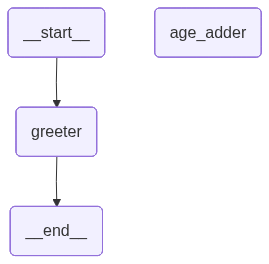

In [45]:
# Let's have a look at this graph before adding the edges
from IPython.display import Image, display
app = graph.compile()
display(Image(app.get_graph().draw_mermaid_png()))

As you can see, age_adder node is not even included in the execution path. We solve this by defining edges between our nodes.

In [46]:
# Syntax if add_edge(<from-node>, <to-node>)
graph.add_edge("greeter", "age_adder")
graph.set_finish_point("age_adder")
app = graph.compile()

Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.
Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


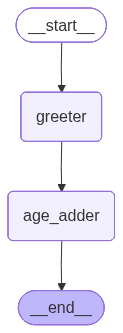

In [47]:
display(Image(app.get_graph().draw_mermaid_png()))

Perfect! Now we have the expected execution. Now let's run this state machine and see the result.

In [48]:
initial_state: AgentState = {
    'name': "Ata",
    'age': "25"
}
final_state: AgentState = app.invoke(initial_state)
print(final_state['final'])

Hey Ata! You are 25 years old!
